<a href="https://colab.research.google.com/github/Mohit-0207/Technical_traning_codings_practice/blob/main/Minor_Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Airport Security Check Waiting Time Analysis (Minor 1 Project) #####


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = {
    "Passenger_ID": [f"P{i:03d}" for i in range(1, 73)],
    "Airport": ["JFK","JFK","JFK","JFK","JFK","JFK","JFK","JFK",
                "LAX","LAX","LAX","LAX","LAX","LAX","LAX","LAX",
                "ORD","ORD","ORD","ORD","ORD","ORD","ORD","ORD",
                "JFK","JFK","JFK","JFK","LAX","LAX","LAX","LAX",
                "ORD","ORD","ORD","ORD","JFK","JFK","JFK","JFK",
                "LAX","LAX","LAX","LAX","ORD","ORD","ORD","ORD",
                "JFK","JFK","JFK","JFK","LAX","LAX","LAX","LAX",
                "ORD","ORD","ORD","ORD","JFK","JFK","JFK","JFK",
                "LAX","LAX","LAX","LAX","ORD","ORD","ORD","ORD"],
    "Checkpoint_Type": ["Regular","Regular","PreCheck","PreCheck"] * 18,
    "Day": ["Monday"]*12 + ["Tuesday"]*8 + ["Wednesday"]*8 +
           ["Thursday"]*8 + ["Friday"]*12 + ["Saturday"]*12 + ["Sunday"]*12,
    "Hour": [6,6,6,6,7,7,7,7,8,8,8,8,
             9,9,9,9,10,10,10,10,
             11,11,11,11,12,12,12,12,
             13,13,13,13,14,14,14,14,
             15,15,15,15,16,16,16,16,
             17,17,17,17,8,8,8,8,
             9,9,9,9,10,10,10,10,
             11,11,11,11,12,12,12,12,
             13,13,13,13],
    "Wait_Time_Min": [
        28,31,9,11,35,38,12,14,42,39,15,13,
        25,27,8,10,22,24,7,9,18,20,6,7,
        30,32,10,12,34,36,11,13,26,28,9,8,
        45,48,18,16,52,50,20,22,40,42,17,19,
        22,24,7,8,26,28,9,10,20,21,6,7,
        24,26,8,9,29,31,10,11,23,25,7,8
    ]
}

df = pd.DataFrame(data)


In [3]:
mean_wait = df["Wait_Time_Min"].mean()
std_wait = df["Wait_Time_Min"].std()

print("Mean Waiting Time:", round(mean_wait, 2))
print("Standard Deviation:", round(std_wait, 2))


Mean Waiting Time: 20.93
Standard Deviation: 12.2


In [4]:
group_stats = df.groupby("Checkpoint_Type")["Wait_Time_Min"].agg(["mean", "std"])
print(group_stats)


                      mean       std
Checkpoint_Type                     
PreCheck         11.000000  4.174754
Regular          30.861111  9.027427


<Figure size 640x480 with 0 Axes>

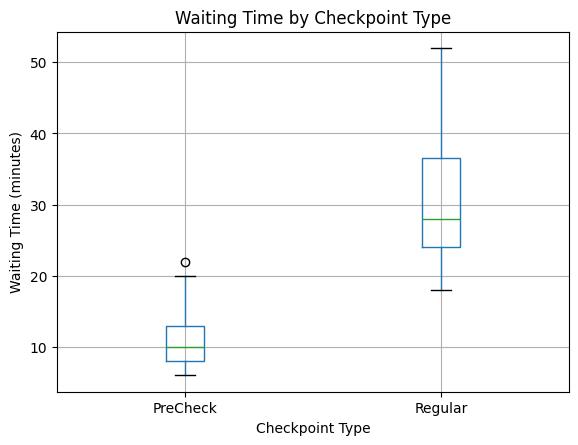

In [5]:
plt.figure()
df.boxplot(column="Wait_Time_Min", by="Checkpoint_Type")
plt.title("Waiting Time by Checkpoint Type")
plt.suptitle("")
plt.xlabel("Checkpoint Type")
plt.ylabel("Waiting Time (minutes)")
plt.show()


<Figure size 640x480 with 0 Axes>

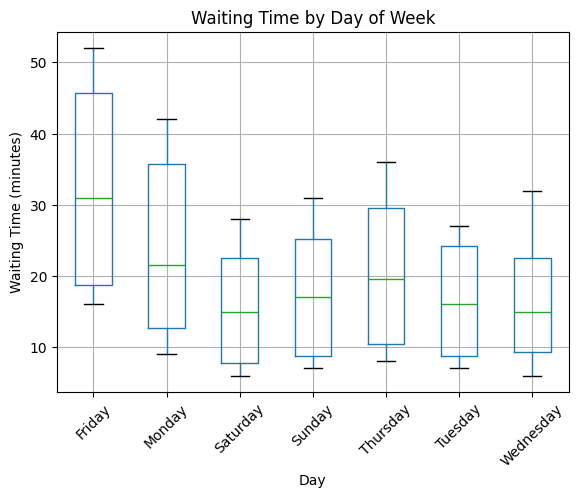

In [6]:
plt.figure()
df.boxplot(column="Wait_Time_Min", by="Day", rot=45)
plt.title("Waiting Time by Day of Week")
plt.suptitle("")
plt.xlabel("Day")
plt.ylabel("Waiting Time (minutes)")
plt.show()


<Figure size 640x480 with 0 Axes>

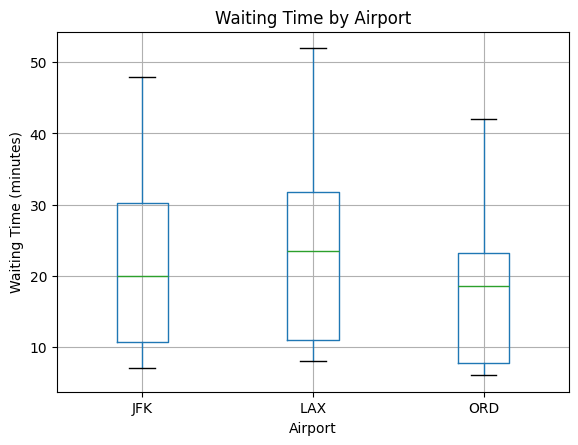

In [7]:
plt.figure()
df.boxplot(column="Wait_Time_Min", by="Airport")
plt.title("Waiting Time by Airport")
plt.suptitle("")
plt.xlabel("Airport")
plt.ylabel("Waiting Time (minutes)")
plt.show()


In [8]:
peak_hours = df[(df["Hour"] >= 15) & (df["Hour"] <= 17)]
off_peak_hours = df[(df["Hour"] >= 8) & (df["Hour"] <= 11)]

print("Peak Hours Mean Wait:", round(peak_hours["Wait_Time_Min"].mean(), 2))
print("Off-Peak Hours Mean Wait:", round(off_peak_hours["Wait_Time_Min"].mean(), 2))


Peak Hours Mean Wait: 32.42
Off-Peak Hours Mean Wait: 17.09
